# Segunda lista - Problema grupal 1

## Componentes del grupo

* Pol Casacuberta Gil
* Joaquin Faraone Prieto
* Agnès Felip i Díaz
* Marta Granero i Martí

## Predicción del uso de bicicletas

### El uso compartido de bicicletas es un servicio proporcionado por cualquier ciudad importante del mundo, por lo que comprender y predecir el comportamiento del sistema es un elemento clave. Vamos a trabajar con el conjunto de datos de bicicletas compartidas del repositorio de conjuntos de datos de UCI que recopila estadísticas agregadas de uso de bicicletas junto con otra información adicional relevante. Se pueden descargar los datos desde aquí [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

### El objetivo de este problema es predecir cúantas bicicletas se usarán diáriamente (el archivo day.csv). Podéis leer en el $\texttt{Readme.txt}$ los detalles sobre las variables

### Procedamos con los ejercicios que se nos piden

#### a) El primer paso es preprocesar y preparar los datos antes de ajustar cualquier modelo. Hay algunas variables que no són útiles para el problema o que no tiene sentido usar. Eliminad-las del conjunto de datos. Dividid los datos en conjuntos de entrenamiento y test $(60\%/40\%)$. Haced una exploración mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables, especialmente con la variable objetivo. Describid las cosas que hayáis visto que os parezcan interesantes. Estandarizad las variables(calculad el estandarizador a partir de los datos del entrenamiento y luego aplicadlo a los datos de test).

In [ ]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
# !pip install pandas --upgrade --user --quiet
# !pip install numpy --upgrade --user --quiet
# !pip install scipy --upgrade --user --quiet
# !pip install statsmodels --upgrade --user --quiet
# !pip install scikit-learn --upgrade --user --quiet
# !pip install plotly --upgrade --user --quiet
# !pip install apafib --upgrade --user --quiet

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix

from sklearn import datasets
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
bicicletas_data = pd.read_csv("./Bike-Sharing-Dataset/day.csv", header=0, delimiter=',')
bicicletas_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bicicletas_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [4]:
# no hay datos faltantes
# posible datos inecesarios 
# season, yr, mnth, holiday, weekday, workingday (embutidos en fecha)  
bicicletas_data.drop(columns=['yr', 'instant'], inplace=True) # ejemplo, me cargo year
bicicletas_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667
atemp,731.0,NaN,NaN,NaN,0.474354,0.162961,0.07907,0.337842,0.486733,0.608602,0.840896
hum,731.0,NaN,NaN,NaN,0.627894,0.142429,0.0,0.52,0.626667,0.730209,0.9725


In [5]:
bicicletas_train, bicicletas_test = train_test_split(bicicletas_data, test_size=0.4, random_state=0)
bicicletas_train.shape, bicicletas_test.shape

((438, 14), (293, 14))

In [6]:
for col in bicicletas_train.columns:
  print(col) 

dteday
season
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


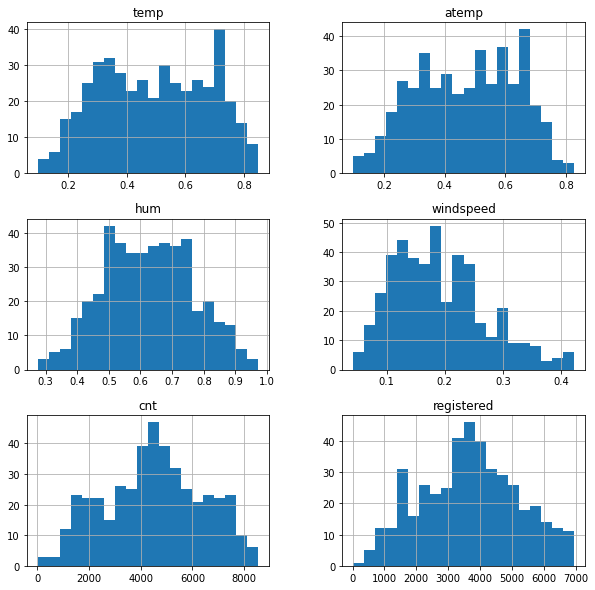

In [10]:
bicicletas_train.loc[:,['temp','atemp', 'hum', 'windspeed', 'cnt', 'registered']].hist(bins=20, figsize=(10,10));

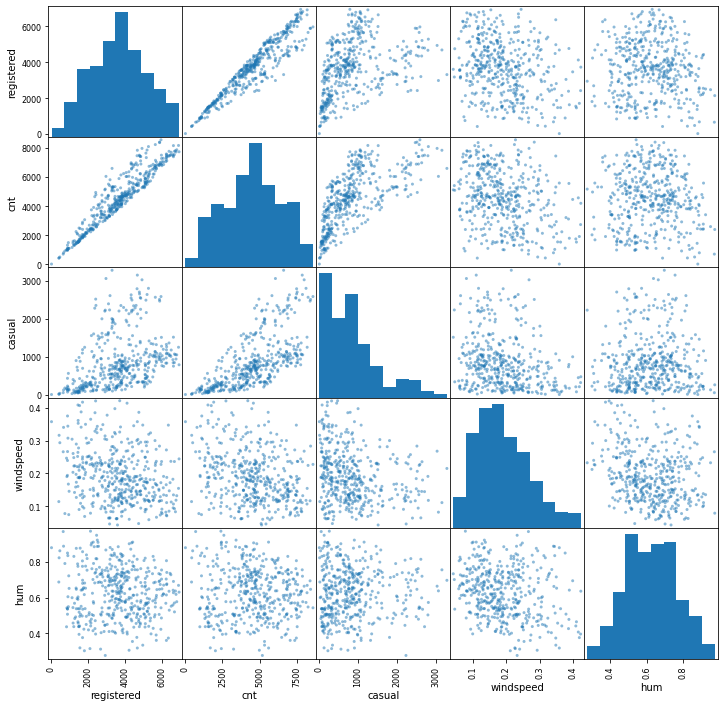

In [16]:
scatter_matrix(bicicletas_train.loc[:,['registered', 'cnt', 'casual', 'windspeed','hum']],figsize=(12,12));

In [ ]:
#registered y count es evidente! #registered y casual yo diria que tambien.

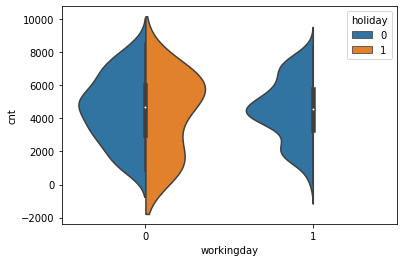

In [27]:
sns.violinplot(data=bicicletas_train, x= "workingday", y="cnt", hue = "holiday", split=True);  

#### b) Aplicad algun método de reducción de dimensionalidad a los datos de entrenamiento y comentad lo que se pueda apreciar en la visualización. Pensad en qué podéis representar sobre la transformación.

#### c) La variable a predecir es un conteo. En este caso podría tener sentido utilizar un regresor que use un modelo adecuado para este tipo de datos como el $\texttt{PoissonRegressor}$ de scikit-learn. Veréis que tiene un parámetro de regularización $\texttt{alpha}$ que necesitaréis ajustar usando validación cruzada. Con el mejor parámetro de regularización según el error de validación cruzada, ajustad el modelo con los datos de entrenamiento y calculad la $\textit{calidad}$ del modelo con los datos de test.

#### d) A veces el modelo que parece adecuado no lo es tanto después de todo. Ajustad una regresión lineal a los datos y calculad la $\textit{calidad}$ del modelo empleando validación cruzada y con los datos de test.

#### e) Cuando se trata de entender un problema, es útil reducir el número de atributos en el modelo. Ajustad una regresión LASSO (ajustando la regularización usando la versión CV del modelo) y calculad la $\textit{calidad}$ del modelo con los datos de test.

#### f) Ahora podemos analizar y comparar los resultados:
* Comparad los valores pronosticados con los valores reales de los tres modelos y sus calidades. ¿Qué modelo os parece mejor? ¿Por qué?
* Analizad los pesos de la regresión lineal y LASSO. ¿Qué atributos son más importantes? ¿Hay atributos que no son relevantes?
* Comparad las predicciones de la regresión de Poisson y la regresión de LASSO. ¿Hay alguna diferencia en su comportamiento? ¿Qué creéis que está pasando?